In [17]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine
# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Wypisz raport z uczenia: confusion_matrix oraz classification_report

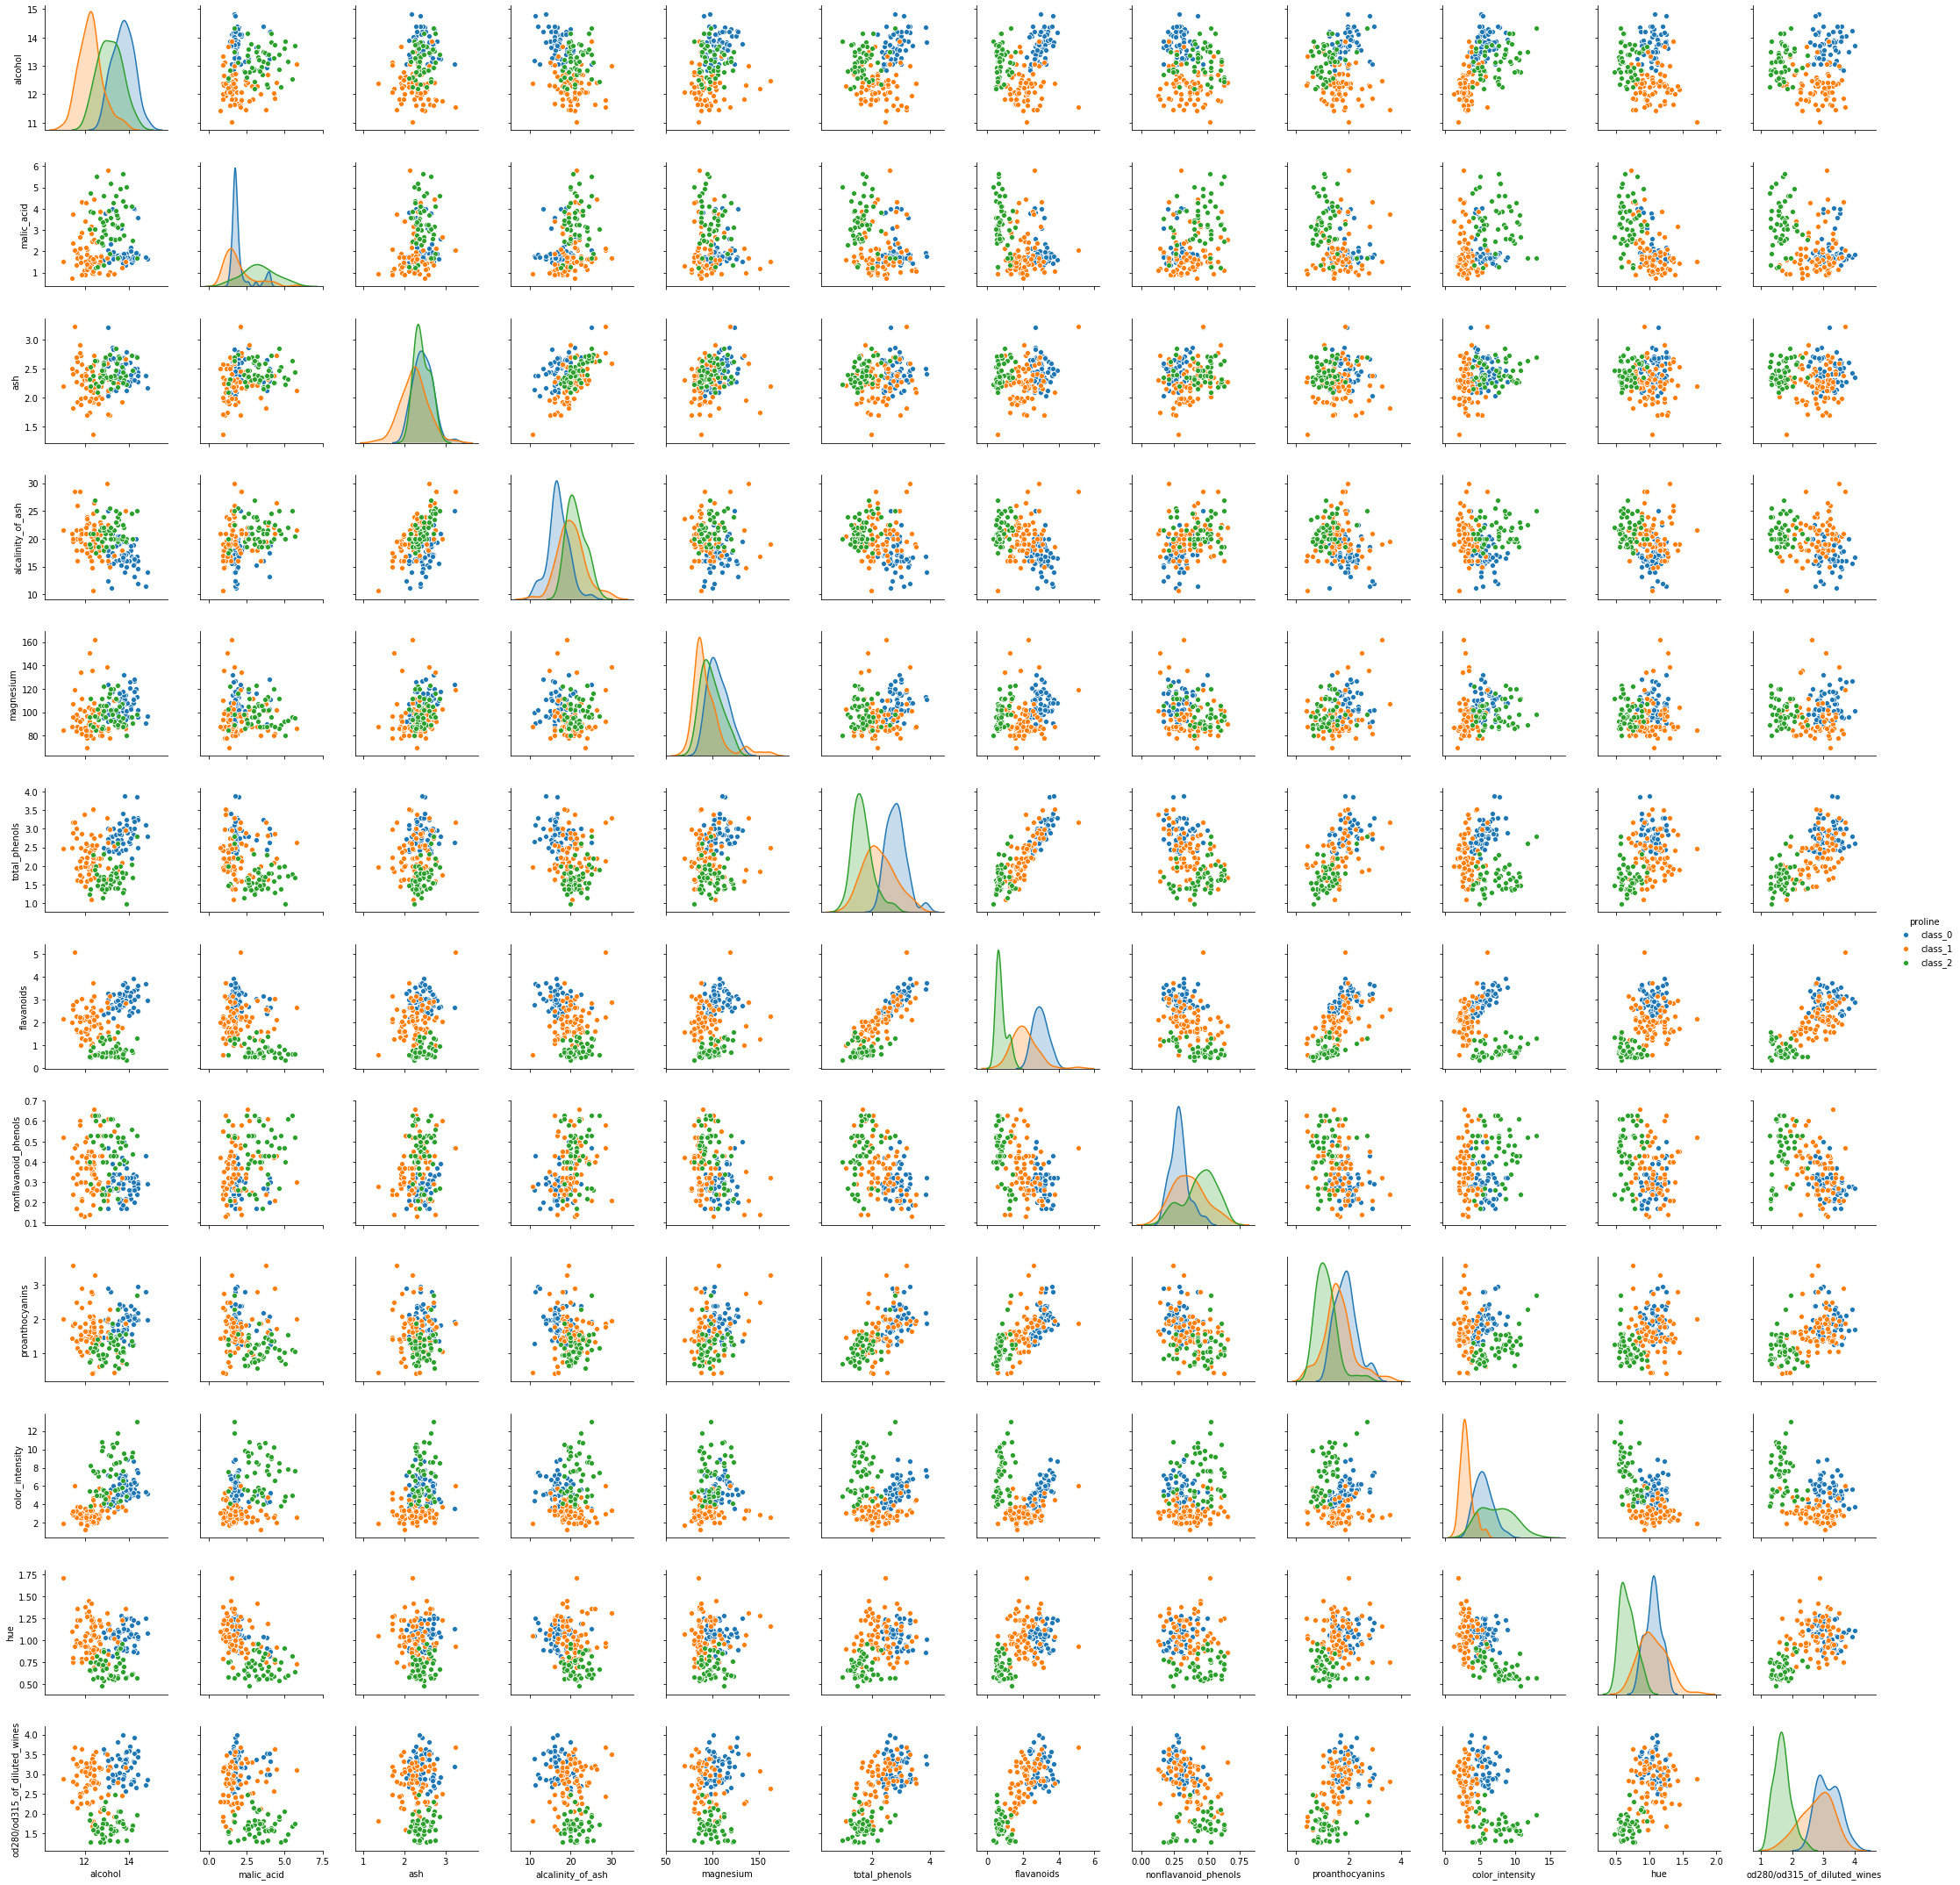

In [27]:
# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

wines = load_wine()
wine_df = pd.DataFrame(wines['data'], columns=wines['feature_names'])
targets_Wine = map(lambda x: wines['target_names'][x], wines['target'] )
wine_df['proline'] = np.array(list(targets_Wine))
sns.pairplot(wine_df, hue='proline')
plt.show()


In [19]:
wine_df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0  class_0        1.71  2.43               15.6      127.0           2.80   
1  class_0        1.78  2.14               11.2      100.0           2.65   
2  class_0        2.36  2.67               18.6      101.0           2.80   
3  class_0        1.95  2.50               16.8      113.0           3.85   
4  class_0        2.59  2.87               21.0      118.0           2.80   
5  class_0        1.76  2.45               15.2      112.0           3.27   
6  class_0        1.87  2.45               14.6       96.0           2.50   
7  class_0        2.15  2.61               17.6      121.0           2.60   
8  class_0        1.64  2.17               14.0       97.0           2.80   
9  class_0        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [36]:
# Podziel zbiór danych na uczący i testowy.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = wines.data #cechy
y = wines.target #etykiety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Wytrenuj klasyfikator kNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)
print('Predykaty: ', y_pred)

# Sprawdzamy dokładność klasyfikatora
print('Dokladnosc: ', knn.score(X_test, y_test))

# Wypisz raport z uczenia: confusion_matrix oraz classification_report
print('confusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Predykaty:  [1 2 0 1 1 2 1 0 1 1 2 0 1 0 1 0 1 0 2 1 2 0 0 0 0 2 1 0 0 2 0 2 2 0 2 0 0
 1 1 2 1 1 2 2 0 1 2 2 1 2 1 0 1 1]
Dokladnosc:  0.7407407407407407
confusion_matrix:
[[18  0  2]
 [ 0 15  7]
 [ 0  5  7]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.75      0.68      0.71        22
           2       0.44      0.58      0.50        12

    accuracy                           0.74        54
   macro avg       0.73      0.72      0.72        54
weighted avg       0.77      0.74      0.75        54

